# NOTE !!!

# Code2 is the continue of code1. Code 1 runs dataset Data_1, Data_3, Data_4 and Code 2 runs Data_5.

# Scroll all the way to the last part

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'



# Part I: Import Three Datasets

In [3]:
# Load Dataset 1

filename = 'winequality-red.csv'
data1 = pd.read_csv(filename,delimiter = ';')
# print(data1.quality.unique())
# print (len(data1[data1['quality'] > 5]))
# print (len(data1[data1['quality'] <= 5]))

# Let the quality value larger than 5 to be 1, quality value less than 5 to be -1.
data1.quality.loc[(data1['quality'] > 5)] = 1
data1.quality.loc[(data1['quality'] != 1)] = -1
print(data1.shape)
data1.head(5)

(1599, 12)


/Users/ziwenzeng/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1


In [4]:
sd = data1['fixed acidity'].std()
# data1['fixed acidity']=(data1['fixed acidity'] - data1['fixed acidity'].mean())/sd

# Normalize dataframe by each columns
data1['fixed acidity']=((data1['fixed acidity']-data1['fixed acidity'].min())/(data1['fixed acidity'].max()-data1['fixed acidity'].min()))
data1['volatile acidity']=((data1['volatile acidity']-data1['volatile acidity'].min())/(data1['volatile acidity'].max()-data1['volatile acidity'].min()))
data1['citric acid']=((data1['citric acid']-data1['citric acid'].min())/(data1['citric acid'].max()-data1['citric acid'].min()))
data1['residual sugar']=((data1['residual sugar']-data1['residual sugar'].min())/(data1['residual sugar'].max()-data1['residual sugar'].min()))
data1['chlorides']=((data1['chlorides']-data1['chlorides'].min())/(data1['chlorides'].max()-data1['chlorides'].min()))
data1['free sulfur dioxide']=((data1['free sulfur dioxide']-data1['free sulfur dioxide'].min())/(data1['free sulfur dioxide'].max()-data1['free sulfur dioxide'].min()))
data1['total sulfur dioxide']=((data1['total sulfur dioxide']-data1['total sulfur dioxide'].min())/(data1['total sulfur dioxide'].max()-data1['total sulfur dioxide'].min()))
data1['density']=((data1['density']-data1['density'].min())/(data1['density'].max()-data1['density'].min()))
data1['pH']=((data1['pH']-data1['pH'].min())/(data1['pH'].max()-data1['pH'].min()))
data1['sulphates']=((data1['sulphates']-data1['sulphates'].min())/(data1['sulphates'].max()-data1['sulphates'].min()))
data1['alcohol']=((data1['alcohol']-data1['alcohol'].min())/(data1['alcohol'].max()-data1['alcohol'].min()))

data1.head(5)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,-1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,-1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,-1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,-1


In [5]:
# TRY normalize the whole dataframe: data1
filename = 'winequality-red.csv'
data1 = pd.read_csv(filename,delimiter = ';')

data1.quality.loc[(data1['quality'] > 5)] = 1
data1.quality.loc[(data1['quality'] != 1)] = -1
data1=((data1-data1.min())/(data1.max()-data1.min()))
data1

/Users/ziwenzeng/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.0
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.0
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,1.0
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,1.0
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.0


In [6]:
# Load Dataset 3: Predict the Iris Category

filename = 'iris.data'
data3 = pd.read_csv(filename)

# Rename thee columns
data3.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

# Let class = Iris-setosa to be 1, let the class that is not Iris-setosa to be -1
data3 = data3.replace({'class':'Iris-setosa'}, 1)
data3 = data3.replace({'class':'Iris-virginica'}, -1)
data3 = data3.replace({'class':'Iris-versicolor'}, -1)

print(data3.shape)
data3.head(5)

(149, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,5.4,3.9,1.7,0.4,1


In [7]:
# Load Dataset 4: Car Evaluation

filename = 'car.data'
data4 = pd.read_csv(filename)
data4.columns = ['Buying','Maintenance_price','Doors','Person','Lug_boot','Safety','Acceptability']

# Data Cleaning: make sure 'Door' and 'Person" all use integer values
data4.Doors.loc[(data4['Doors'] == '5more' )] = 7
data4.Person.loc[(data4['Person'] == 'more' )] = 7

# Data Cleaning: convert car acceptability to -1 when it's 'unacceptible' and 'acceptiable', +1 when it's 'good' and 'very good'.  
data4.Acceptability.loc[(data4['Acceptability'] == 'unacc' )] = -1
data4.Acceptability.loc[(data4['Acceptability'] == 'acc' )] = -1
data4.Acceptability.loc[(data4['Acceptability'] == 'good' )] = +1
data4.Acceptability.loc[(data4['Acceptability'] == 'vgood' )] = +1

# One-hot Encoding on 'buying','lug_boot', 'maintenance','safety'
buying = pd.get_dummies(data4['Buying'],prefix=['Buying'])
maintenance = pd.get_dummies(data4['Maintenance_price'],prefix = ['Maintenance_price'])
lug = pd.get_dummies(data4['Lug_boot'],prefix = ['Lug_boot'])
safety = pd.get_dummies(data4['Safety'],prefix = ['Safety'])

data4 = pd.concat([data4,buying,maintenance,lug,safety],axis = 1)
data4 = data4.drop(['Buying','Maintenance_price','Lug_boot','Safety'],axis = 1)

# Put the predicted part ('area') to the last column
Acceptability = data4['Acceptability']
data4.drop(labels = ['Acceptability'],axis = 1, inplace = True)
data4.insert(16,'Acceptability',Acceptability)
data4.head(5)
# print(data4.shape)



,Doors,Person,['Buying']_high,['Buying']_low,['Buying']_med,['Buying']_vhigh,['Maintenance_price']_high,['Maintenance_price']_low,['Maintenance_price']_med,['Maintenance_price']_vhigh,['Lug_boot']_big,['Lug_boot']_med,['Lug_boot']_small,['Safety']_high,['Safety']_low,['Safety']_med,Acceptability
0,2,2,0,0,0,1,0,0,0,1,0,0,1,0,0,1,-1
1,2,2,0,0,0,1,0,0,0,1,0,0,1,1,0,0,-1
2,2,2,0,0,0,1,0,0,0,1,0,1,0,0,1,0,-1
3,2,2,0,0,0,1,0,0,0,1,0,1,0,0,0,1,-1
4,2,2,0,0,0,1,0,0,0,1,0,1,0,1,0,0,-1


In [8]:
# Load Dataset 5: Census Income

filename = 'adult.data'
data5 = pd.read_csv(filename)


# # Rename thee columns
data5.columns = ['age','workclass','fnlwgt','education','edu_num','marry_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours-per-week','native_country','income']

data5 = data5.drop(['fnlwgt','marry_status','hours-per-week','occupation','native_country','relationship','edu_num'], axis=1)

data5.drop(data5.loc[data5['workclass']==' ?'].index, inplace=True)

data5.income.loc[(data5['income'] == ' <=50K' )] = -1
data5.income.loc[(data5['income'] == ' >50K' )] = +1

workclass = pd.get_dummies(data5['workclass'],prefix=['workclass'])
education = pd.get_dummies(data5['education'],prefix = ['education'])
# marry_status = pd.get_dummies(data5['marry_status'],prefix = ['marry_status'])
race = pd.get_dummies(data5['race'],prefix = ['race'])
sex = pd.get_dummies(data5['sex'],prefix = ['sex'])


data5 = pd.concat([data5,workclass,education,race,sex],axis = 1)
data5 = data5.drop(['workclass','education','race','sex'],axis = 1)

# Put the predicted part ('area') to the last column
income = data5['income']
data5.drop(labels = ['income'],axis = 1, inplace = True)
data5.insert(34,'income',income)

data5 = data5.sample(n=7000)

# data5.reset_index()
data5.head(5)
print(data5.shape)
# print(data5['income'].unique())


(7000, 35)


/Users/ziwenzeng/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
print(data5.loc[data5.income == 1, 'income'].count())
print(data5.loc[data5.income == -1, 'income'].count())

1765
5235


In [10]:
# Prepare three datasets:

#1) Convert dataframe into nparray
#2) shuffle the data

Data_1 = data1.values
# Data_2 = data2.values
Data_3 = data3.values
Data_4 = data4.values
Data_5 = data5.values

print(Data_1.shape)
# print(Data_2.shape)
print(Data_3.shape)
print(Data_4.shape)
print(Data_5.shape)

(1599, 12)
(149, 5)
(1727, 17)
(7000, 35)


# Classifiers

In [17]:
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [18]:
def draw_heatmap(acc, acc_desc, param_1, param_2):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=param_1, yticklabels=param_2)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\C$', ylabel='$Kernel$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [19]:
# One function to finish SVM classifier
def runSVM(Data,partition,C_list):
    np.random.shuffle(Data)
    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (0 or 1)

    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.
    
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')
    
#     # Initiate SVM Classifier
#     C_list     = [0.001,0.005,0.01,0.05,0.1,0.5,1,2] # Different C to try. 1,2,5,10,15

    Kernel_list = ['linear','rbf']
    clf = SVC()
    
    # Define hyper-paramter C
    parameters = {'kernel': Kernel_list,'C':C_list}
    
    # Get best paramter by doing cross-validation through gridSearch
    classifier = GridSearchCV(clf,parameters,cv=3, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)

    # Find the training accuracy and validation accuracy corresponding to best paramter
    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
  
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc) 
    
#     train_acc = np.reshape(train_acc,(2,8))
#     val_acc = np.reshape(val_acc,(2,8))

#     draw_heatmap(train_acc, 'train accuracy', C_list, Kernel_list )
#     draw_heatmap(val_acc, 'val accuracy', C_list, Kernel_list)
    
    # Get the best paramters
    Best_C = classifier.best_params_['C']
    Best_Kernel = classifier.best_params_['kernel']
    parameter = classifier.best_params_
    
#     print("Train_acc is:" + str(best_train_acc))
#     print("Val_acc is:" + str(best_val_acc))
    # Compute test accuracy based on best parameters
    clf = svm.SVC(C = Best_C,kernel = Best_Kernel)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)

    return parameter, best_train_acc, best_val_acc, test_acc

In [20]:
def SVM(Data,Partition,C_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runSVM(Data,Partition,C_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_svm = train_avg/3
    val_avg_svm = val_avg/3
    test_avg_svm = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_svm))
    print("Average val accuracy is: " + str(val_avg_svm))
    print("Average test accuracy is: " + str(test_avg_svm))
    
    return train_avg_svm,val_avg_svm,test_avg_svm

In [21]:
# One function to finish Random Forest Classifier
def runRMF(Data,partition,estimator_list):
    # Initiate RamdomForestClassifier
    np.random.shuffle(Data)
    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (0 or 1)
    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.
    
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')
    
    clf = RandomForestClassifier()
    # Define max_features by the number of features in X_train_val
    
    length = len(X_train_val[0])
    features = []
    for i in range(length):
        features.append(i+1)
    
    # Define hyper-parameters to be criterion and n_estimator for cross-validation
    parameters = {'criterion':['entropy','gini'],'n_estimators': estimator_list,'max_features':features}
    # Use GrideSearch for cross-validation for hyper paramters
    
    classifier = GridSearchCV(clf, parameters,cv = 3, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)

    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
    
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc)
    
    # Get the best paramters
    Best_criterion = classifier.best_params_['criterion']
    Best_n_estimators = classifier.best_params_['n_estimators']
    Best_max_features = classifier.best_params_['max_features']
    parameter = classifier.best_params_

    # Compute test accuracy based on best hyper-paramters
    clf = RandomForestClassifier(criterion = Best_criterion , n_estimators = Best_n_estimators, max_features = Best_max_features)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)
    
    return parameter, best_train_acc, best_val_acc, test_acc




In [22]:
def RMF(Data,Partition,n_estimator_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runRMF(Data,Partition,n_estimator_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_rmf = train_avg/3
    val_avg_rmf = val_avg/3
    test_avg_rmf = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_rmf))
    print("Average val accuracy is: " + str(val_avg_rmf))
    print("Average test accuracy is: " + str(test_avg_rmf))
    
    return train_avg_rmf, val_avg_rmf,test_avg_rmf

In [23]:
def runKNN(Data,partition,K_list):

    np.random.shuffle(Data)

    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (0 or 1)
    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.
    
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')

#     K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    parameters = {'n_neighbors':K_list}
    clf = KNeighborsClassifier()
    
    # Get best paramter by doing cross-validation through gridSearch
    classifier = GridSearchCV(clf,parameters,cv=5, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)

    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
    
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc)

    # Get the best paramters
    Best_N = classifier.best_params_['n_neighbors']
    parameter = classifier.best_params_
#     print("The best parameters: " + str(classifier.best_params_))

    # Compute test accuracy based on best hyper-paramters
    clf = KNeighborsClassifier(n_neighbors = Best_N)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)

    return parameter, best_train_acc, best_val_acc, test_acc




In [24]:
def KNN(Data,partition,K_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runKNN(Data,partition,K_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_knn = train_avg/3
    val_avg_knn = val_avg/3
    test_avg_knn = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_knn))
    print("Average val accuracy is: " + str(val_avg_knn))
    print("Average test accuracy is: " + str(test_avg_knn))
    
    return train_avg_knn,val_avg_knn,test_avg_knn

In [25]:
def runADB(Data,partition,learning_rate,n_estimator_list):
    np.random.shuffle(Data)
    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (0 or 1)
    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.

  
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')
    
    parameters = {'n_estimators': n_estimator_list,'learning_rate':learning_rate}
    # Use GrideSearch for cross-validation for hyper paramters
    
    clf = AdaBoostClassifier()
    classifier = GridSearchCV(clf, parameters,cv = 5, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)
    
    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
    
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc)
    # Get the best paramters
    Best_learning_rate = classifier.best_params_['learning_rate']
    Best_n_estimators = classifier.best_params_['n_estimators']
    parameter = classifier.best_params_
    
#     print("The best parameters: " + str(classifier.best_params_))
    # Compute test accuracy based on best hyper-paramters
    clf = AdaBoostClassifier(learning_rate = Best_learning_rate , n_estimators = Best_n_estimators)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)
    
    return parameter, best_train_acc, best_val_acc, test_acc



In [26]:
def ADB(Data,partition,learning_rate,n_estimator_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runADB(Data,partition,learning_rate,n_estimator_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_adb = train_avg/3
    val_avg_adb = val_avg/3
    test_avg_adb = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_adb))
    print("Average val accuracy is: " + str(val_avg_adb))
    print("Average test accuracy is: " + str(test_avg_adb))
    
    return train_avg_adb,val_avg_adb,test_avg_adb

In [27]:
def runLOG(Data,partition,C_list):

    np.random.shuffle(Data)

    X = Data[:, 0:-1]         # First column to second last column: Features (numerical values) 
    Y = Data[:, -1]           # Last column: Labels (0 or 1)
    X_train_val = X[:int(partition*len(X))] # Get features from train + val set.
    X_test      = X[int(partition*len(X)):] # Get features from test set.     
    Y_train_val = Y[:int(partition*len(Y))] # Get labels from train + val set.
    Y_test     = Y[int(partition*len(Y)):] # Get labels from test set.
    
    Y_train_val = Y_train_val.astype('int')
    Y_test = Y_test.astype('int')

#     K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    parameters = {'C':C_list}
    clf = LogisticRegression()
    
    # Get best paramter by doing cross-validation through gridSearch
    classifier = GridSearchCV(clf,parameters,cv=3, return_train_score = True)
    classifier.fit(X_train_val,Y_train_val)

    train_acc =  classifier.cv_results_['mean_train_score']
    best_train_acc = np.amax(train_acc) 
    
    val_acc = classifier.cv_results_['mean_test_score']
    best_val_acc = np.amax(val_acc)

    # Get the best paramters
    Best_C = classifier.best_params_['C']
    parameter = classifier.best_params_
#     print("The best parameters: " + str(classifier.best_params_))

    # Compute test accuracy based on best hyper-paramters
    clf = LogisticRegression(C = Best_C)
    clf.fit(X_train_val,Y_train_val)
    test_acc = clf.score(X_test, Y_test)

    return parameter, best_train_acc, best_val_acc, test_acc

In [28]:
def LOG(Data,partition,C_list):
    train_avg = 0
    val_avg = 0
    test_avg = 0

    for i in range(3):
        p, train_acc,val_acc, test_acc = runLOG(Data,partition,C_list)
        best_p = p
        train_avg = train_avg + train_acc
        val_avg = val_avg + val_acc
        test_avg = test_avg + test_acc

        print("\n"+"Trial " + str(i+1))
        print("Best parameter: " + str(best_p))
        print("train accuracy is: " + str(train_acc))
        print("val accuracy is: " + str(val_acc))
        print("test accuracy is: " + str(test_acc))

    train_avg_log = train_avg/3
    val_avg_log = val_avg/3
    test_avg_log = test_avg/3

    print("\n"+"Average train accuracy is: " + str(train_avg_log))
    print("Average val accuracy is: " + str(val_avg_log))
    print("Average test accuracy is: " + str(test_avg_log))
    
    return train_avg_log,val_avg_log,test_avg_log

In [ ]:
<div style="page-break-after: always;"></div>

# Dataset 5: Census Income

Classifier: SVM

In [29]:
# Partition(20/80)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_20_5,val_avg_svm_20_5,test_avg_svm_20_5 = SVM(Data_5,0.2,C_list)




Trial 1
Best parameter: {'kernel': 'linear', 'C': 0.001}
train accuracy is: 1.0
val accuracy is: 0.7
test accuracy is: 0.75

Trial 2
Best parameter: {'kernel': 'linear', 'C': 0.001}
train accuracy is: 1.0
val accuracy is: 0.75
test accuracy is: 0.7125

Trial 3
Best parameter: {'kernel': 'linear', 'C': 0.001}
train accuracy is: 1.0
val accuracy is: 0.8
test accuracy is: 0.7375

Average train accuracy is: 1.0
Average val accuracy is: 0.75
Average test accuracy is: 0.7333333333333334


In [32]:
# Partition(50/50)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_50_5,val_avg_svm_50_5,test_avg_svm_50_5 = SVM(Data_5,0.5,C_list)




Trial 1
Best parameter: {'kernel': 'linear', 'C': 0.001}
train accuracy is: 1.0
val accuracy is: 0.74
test accuracy is: 0.78

Trial 2
Best parameter: {'kernel': 'rbf', 'C': 10}
train accuracy is: 1.0
val accuracy is: 0.8
test accuracy is: 0.66

Trial 3
Best parameter: {'kernel': 'linear', 'C': 0.001}
train accuracy is: 1.0
val accuracy is: 0.72
test accuracy is: 0.8

Average train accuracy is: 1.0
Average val accuracy is: 0.7533333333333333
Average test accuracy is: 0.7466666666666667


In [31]:
# Partition(80/20)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_svm_80_5,val_avg_svm_80_5,test_avg_svm_80_5 = SVM(Data_5,0.8,C_list)




Trial 1
Best parameter: {'kernel': 'linear', 'C': 0.001}
train accuracy is: 0.9875378523177266
val accuracy is: 0.75
test accuracy is: 0.8

Trial 2
Best parameter: {'kernel': 'linear', 'C': 0.001}
train accuracy is: 0.9937106918238993
val accuracy is: 0.75
test accuracy is: 0.9

Trial 3
Best parameter: {'kernel': 'linear', 'C': 0.001}
train accuracy is: 0.9875378523177266
val accuracy is: 0.8
test accuracy is: 0.7

Average train accuracy is: 0.9895954654864508
Average val accuracy is: 0.7666666666666666
Average test accuracy is: 0.8000000000000002


Classifier: Random Forest

In [34]:
# Partition (20/80)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_20_5,val_avg_rmf_20_5,test_avg_rmf_20_5 = RMF(Data_5,0.2,n_estimator_list)


Trial 1
Best parameter: {'max_features': 12, 'n_estimators': 20, 'criterion': 'entropy'}
train accuracy is: 1.0
val accuracy is: 0.85
test accuracy is: 0.725

Trial 2
Best parameter: {'max_features': 28, 'n_estimators': 20, 'criterion': 'entropy'}
train accuracy is: 1.0
val accuracy is: 0.9
test accuracy is: 0.6375

Trial 3
Best parameter: {'max_features': 3, 'n_estimators': 10, 'criterion': 'entropy'}
train accuracy is: 1.0
val accuracy is: 0.85
test accuracy is: 0.7375

Average train accuracy is: 1.0
Average val accuracy is: 0.8666666666666667
Average test accuracy is: 0.6999999999999998


In [35]:
# Partition (50/50)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_50_5,val_avg_rmf_50_5,test_avg_rmf_50_5 = RMF(Data_5,0.5,n_estimator_list)


Trial 1
Best parameter: {'max_features': 23, 'n_estimators': 50, 'criterion': 'entropy'}
train accuracy is: 1.0
val accuracy is: 0.8
test accuracy is: 0.72

Trial 2
Best parameter: {'max_features': 7, 'n_estimators': 100, 'criterion': 'entropy'}
train accuracy is: 1.0
val accuracy is: 0.82
test accuracy is: 0.74

Trial 3
Best parameter: {'max_features': 6, 'n_estimators': 20, 'criterion': 'entropy'}
train accuracy is: 1.0
val accuracy is: 0.88
test accuracy is: 0.68

Average train accuracy is: 1.0
Average val accuracy is: 0.8333333333333334
Average test accuracy is: 0.7133333333333334


In [36]:
# Partition (80/20)
n_estimator_list = [10,20,50,80,100]
train_avg_rmf_80_5,val_avg_rmf_80_5,test_avg_rmf_80_5 = RMF(Data_5,0.8,n_estimator_list)


Trial 1
Best parameter: {'max_features': 3, 'n_estimators': 10, 'criterion': 'gini'}
train accuracy is: 0.9938271604938271
val accuracy is: 0.75
test accuracy is: 0.7

Trial 2
Best parameter: {'max_features': 11, 'n_estimators': 20, 'criterion': 'entropy'}
train accuracy is: 1.0
val accuracy is: 0.7625
test accuracy is: 0.8

Trial 3
Best parameter: {'max_features': 14, 'n_estimators': 10, 'criterion': 'gini'}
train accuracy is: 1.0
val accuracy is: 0.825
test accuracy is: 0.75

Average train accuracy is: 0.9979423868312757
Average val accuracy is: 0.7791666666666667
Average test accuracy is: 0.75


Classifier: KNN

In [39]:
# Partition (20/80)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
train_avg_knn_20_5, val_avg_knn_20_5, test_avg_knn_20_5 = KNN(Data_5,0.2,K_list)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)



Trial 1
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 0.8
test accuracy is: 0.5375

Trial 2
Best parameter: {'n_neighbors': 4}
train accuracy is: 1.0
val accuracy is: 0.75
test accuracy is: 0.7375


/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)



Trial 3
Best parameter: {'n_neighbors': 1}
train accuracy is: 1.0
val accuracy is: 0.85
test accuracy is: 0.7125

Average train accuracy is: 1.0
Average val accuracy is: 0.7999999999999999
Average test accuracy is: 0.6625


In [54]:
# Partition (50/50)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_50_5, val_avg_knn_50_5, test_avg_knn_50_5 = KNN(Data_5,0.5,K_list)


Trial 1
Best parameter: {'n_neighbors': 3}
train accuracy is: 0.9851219512195122
val accuracy is: 0.78
test accuracy is: 0.7

Trial 2
Best parameter: {'n_neighbors': 13}
train accuracy is: 1.0
val accuracy is: 0.78
test accuracy is: 0.74

Trial 3
Best parameter: {'n_neighbors': 6}
train accuracy is: 1.0
val accuracy is: 0.82
test accuracy is: 0.68

Average train accuracy is: 0.9950406504065041
Average val accuracy is: 0.7933333333333333
Average test accuracy is: 0.7066666666666667


In [53]:
# Partition (80/20)
K_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]
train_avg_knn_80_5, val_avg_knn_80_5, test_avg_knn_80_5 = KNN(Data_5,0.8,K_list)


Trial 1
Best parameter: {'n_neighbors': 5}
train accuracy is: 0.9905257936507936
val accuracy is: 0.775
test accuracy is: 0.7

Trial 2
Best parameter: {'n_neighbors': 10}
train accuracy is: 0.9905753968253969
val accuracy is: 0.725
test accuracy is: 0.8

Trial 3
Best parameter: {'n_neighbors': 15}
train accuracy is: 0.9906234737484738
val accuracy is: 0.7375
test accuracy is: 0.7

Average train accuracy is: 0.9905748880748882
Average val accuracy is: 0.7458333333333332
Average test accuracy is: 0.7333333333333334


Classifier: Adaboost

In [42]:
# Partition (20/80)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_20_5, val_avg_adb_20_5, test_avg_adb_20_5 = ADB(Data_5,0.2,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'n_estimators': 20, 'learning_rate': 0.2}
train accuracy is: 1.0
val accuracy is: 0.75
test accuracy is: 0.7375

Trial 2
Best parameter: {'n_estimators': 100, 'learning_rate': 0.8}
train accuracy is: 1.0
val accuracy is: 0.75
test accuracy is: 0.7125

Trial 3
Best parameter: {'n_estimators': 20, 'learning_rate': 0.1}
train accuracy is: 1.0
val accuracy is: 0.65
test accuracy is: 0.7625

Average train accuracy is: 1.0
Average val accuracy is: 0.7166666666666667
Average test accuracy is: 0.7375000000000002


In [43]:
# Partition (50/50)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_50_5, val_avg_adb_50_5, test_avg_adb_50_5 = ADB(Data_5,0.5,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'n_estimators': 20, 'learning_rate': 0.1}
train accuracy is: 0.984993746091307
val accuracy is: 0.7
test accuracy is: 0.78

Trial 2
Best parameter: {'n_estimators': 50, 'learning_rate': 1}
train accuracy is: 1.0
val accuracy is: 0.84
test accuracy is: 0.72

Trial 3
Best parameter: {'n_estimators': 20, 'learning_rate': 0.1}
train accuracy is: 1.0
val accuracy is: 0.78
test accuracy is: 0.78

Average train accuracy is: 0.994997915363769
Average val accuracy is: 0.7733333333333334
Average test accuracy is: 0.7600000000000001


In [51]:
# Partition (80/20)
learning_rate = [0.1,0.2,0.5,0.8,1]
n_estimator_list = [20,50,80,100]

train_avg_adb_80_5, val_avg_adb_80_5, test_avg_adb_80_5 = ADB(Data_5,0.8,learning_rate,n_estimator_list)


Trial 1
Best parameter: {'n_estimators': 20, 'learning_rate': 0.8}
train accuracy is: 0.996875
val accuracy is: 0.775
test accuracy is: 0.75

Trial 2
Best parameter: {'n_estimators': 50, 'learning_rate': 0.2}
train accuracy is: 0.9874488705738707
val accuracy is: 0.8125
test accuracy is: 0.75

Trial 3
Best parameter: {'n_estimators': 50, 'learning_rate': 0.5}
train accuracy is: 0.9875
val accuracy is: 0.8
test accuracy is: 0.9

Average train accuracy is: 0.9906079568579568
Average val accuracy is: 0.7958333333333334
Average test accuracy is: 0.7999999999999999


Classifier: Logistic Regression

In [45]:
# Partition(20/80)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_20_5,val_avg_log_20_5,test_avg_log_20_5 = LOG(Data_5,0.2,C_list)


Trial 1
Best parameter: {'C': 0.001}
train accuracy is: 1.0
val accuracy is: 0.75
test accuracy is: 0.75

Trial 2
Best parameter: {'C': 10}
train accuracy is: 1.0
val accuracy is: 0.7
test accuracy is: 0.6875

Trial 3
Best parameter: {'C': 10}
train accuracy is: 1.0
val accuracy is: 0.7
test accuracy is: 0.6875

Average train accuracy is: 1.0
Average val accuracy is: 0.7166666666666667
Average test accuracy is: 0.7083333333333334


In [46]:
# Partition(50/50)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_50_5,val_avg_log_50_5,test_avg_log_50_5 = LOG(Data_5,0.5,C_list)


Trial 1
Best parameter: {'C': 1000}
train accuracy is: 0.9803921568627452
val accuracy is: 0.8
test accuracy is: 0.64

Trial 2
Best parameter: {'C': 0.001}
train accuracy is: 0.9393939393939394
val accuracy is: 0.74
test accuracy is: 0.76

Trial 3
Best parameter: {'C': 0.1}
train accuracy is: 0.9598930481283423
val accuracy is: 0.8
test accuracy is: 0.76

Average train accuracy is: 0.9598930481283423
Average val accuracy is: 0.7799999999999999
Average test accuracy is: 0.7200000000000001


In [47]:
# Partition(80/20)
C_list     = [10**(-3), 10**(-2), 10**(-1),10,10**2,10**3,10**4,10**5]
train_avg_log_80_5,val_avg_log_80_5,test_avg_log_80_5 = LOG(Data_5,0.8,C_list)


Trial 1
Best parameter: {'C': 0.001}
train accuracy is: 0.9128679962013296
val accuracy is: 0.75
test accuracy is: 0.75

Trial 2
Best parameter: {'C': 0.01}
train accuracy is: 0.9256885090218424
val accuracy is: 0.8
test accuracy is: 0.7

Trial 3
Best parameter: {'C': 1000}
train accuracy is: 0.9501514092709061
val accuracy is: 0.775
test accuracy is: 0.8

Average train accuracy is: 0.9295693048313595
Average val accuracy is: 0.775
Average test accuracy is: 0.75


Plot visual representation for Dataset 5

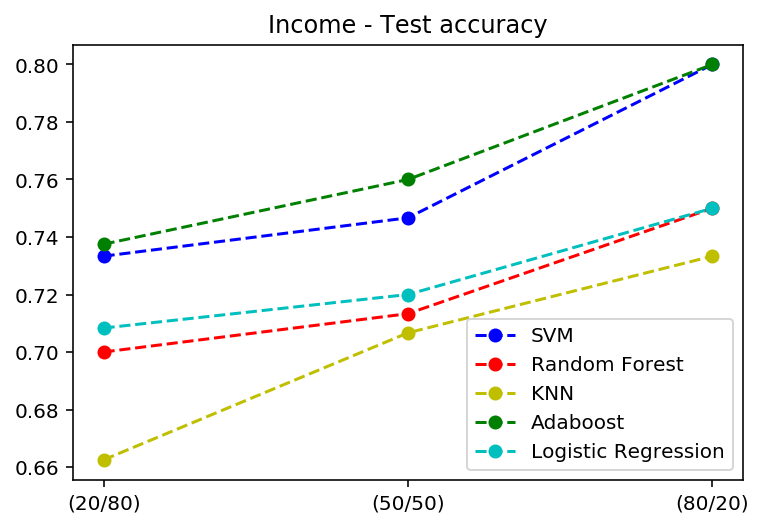

In [55]:
test_svm_list_5 = [test_avg_svm_20_5,test_avg_svm_50_5,test_avg_svm_80_5]
test_rmf_list_5 = [test_avg_rmf_20_5,test_avg_rmf_50_5,test_avg_rmf_80_5]
test_knn_list_5 = [test_avg_knn_20_5,test_avg_knn_50_5,test_avg_knn_80_5]
test_adb_list_5 = [test_avg_adb_20_5,test_avg_adb_50_5,test_avg_adb_80_5]
test_log_list_5 = [test_avg_log_20_5,test_avg_log_50_5,test_avg_log_80_5]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,test_svm_list_5, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,test_rmf_list_5, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,test_knn_list_5, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,test_adb_list_5, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,test_log_list_5, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Income - Test accuracy')
plt.show()



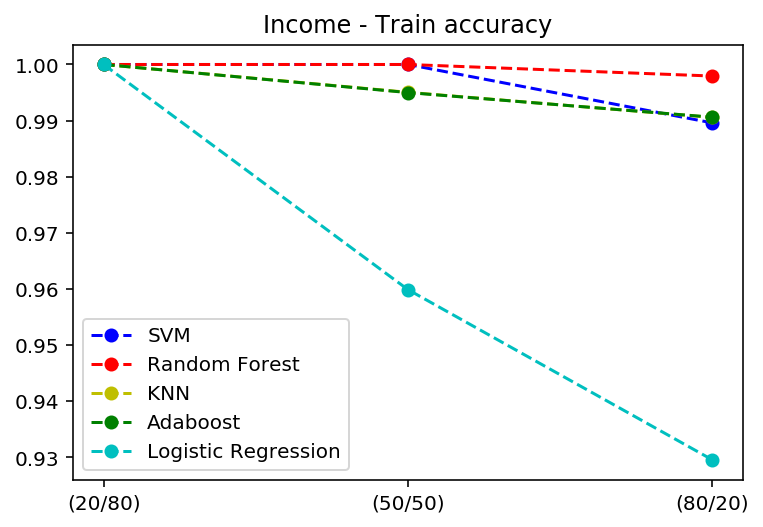

In [56]:
train_svm_list_5 = [train_avg_svm_20_5,train_avg_svm_50_5,train_avg_svm_80_5]
train_rmf_list_5 = [train_avg_rmf_20_5,train_avg_rmf_50_5,train_avg_rmf_80_5]
train_knn_list_5 = [train_avg_knn_20_5,train_avg_knn_50_5,train_avg_knn_80_5]
train_adb_list_5 = [train_avg_adb_20_5,train_avg_adb_50_5,train_avg_adb_80_5]
train_log_list_5 = [train_avg_log_20_5,train_avg_log_50_5,train_avg_log_80_5]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,train_svm_list_5, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,train_rmf_list_5, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,train_knn_list_5, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,train_adb_list_5, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,train_log_list_5, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Income - Train accuracy')
plt.show()

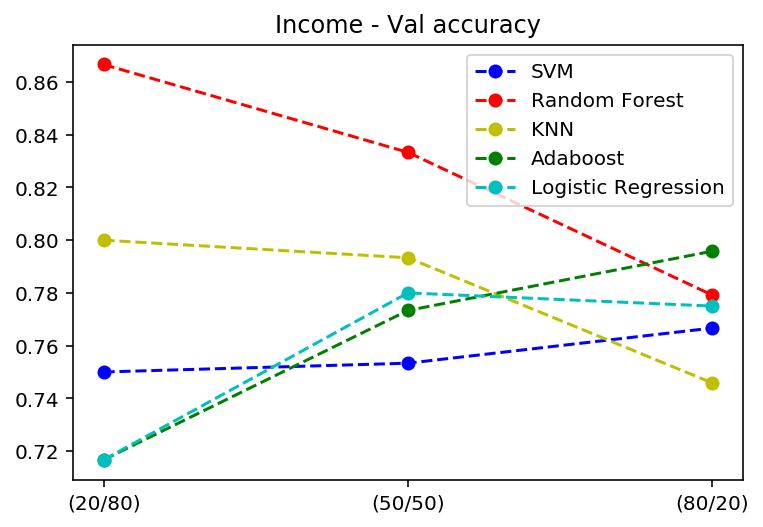

In [57]:
val_svm_list_5 = [val_avg_svm_20_5,val_avg_svm_50_5,val_avg_svm_80_5]
val_rmf_list_5 = [val_avg_rmf_20_5,val_avg_rmf_50_5,val_avg_rmf_80_5]
val_knn_list_5 = [val_avg_knn_20_5,val_avg_knn_50_5,val_avg_knn_80_5]
val_adb_list_5 = [val_avg_adb_20_5,val_avg_adb_50_5,val_avg_adb_80_5]
val_log_list_5 = [val_avg_log_20_5,val_avg_log_50_5,val_avg_log_80_5]

x = ['(20/80)','(50/50)','(80/20)']
plt.plot(x,val_svm_list_5, linestyle='--', marker='o', color='b', label='SVM')
plt.plot(x,val_rmf_list_5, linestyle='--', marker='o', color='r', label='Random Forest')
plt.plot(x,val_knn_list_5, linestyle='--', marker='o', color='y', label='KNN')
plt.plot(x,val_adb_list_5, linestyle='--', marker='o', color='g', label='Adaboost')
plt.plot(x,val_log_list_5, linestyle='--', marker='o', color='c', label='Logistic Regression')

plt.legend()
plt.title('Income - Val accuracy')
plt.show()

# STOP!!!